# Multidimensional differential equations

- Börge Göbel 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

## Heat equation

We solve the differential equations:

\\( 
\frac{\partial}{\partial t} u(\vec{r},t) = a \Delta u(\vec{r},t)
\\)

## In one dimension:

\\( 
\frac{\partial}{\partial t} u(x,t) = a \frac{\partial^2}{\partial x^2} u(x,t)
\\)

Here, \\( u(x,t) \\) is an array \\(\{ u_1, u_2, \dots, u_n \} \\) that has different values for different times. It describes the temperature. We can discretize the spatial derivative according to:

\\( 
\frac{\partial^2}{\partial x^2} u_j = \frac{u_{j+1}-2u_{j}+u_{j-1}}{(\Delta x)^2}
\\)

For the edges we use double-forward or double-backward methods:

\\( 
\frac{\partial^2}{\partial x^2} u_1 = \frac{u_{1}-2u_{2}+u_{3}}{(\Delta x)^2}\\
\frac{\partial^2}{\partial x^2} u_n = \frac{u_{n}-2u_{n-1}+u_{n-2}}{(\Delta x)^2}
\\)

We can rewrite the heat equation as a set of coupled equation:

\begin{align}
\frac{\partial}{\partial t}u_1&=\frac{a}{(\Delta x)^2}\left(u_1-2u_2+u_3\right)\\
\frac{\partial}{\partial t}u_2&=\frac{a}{(\Delta x)^2}\left(u_1-2u_2+u_3\right)\\
\frac{\partial}{\partial t}u_3&=\frac{a}{(\Delta x)^2}\left(u_2-2u_3+u_4\right)\\ 
\vdots\\ 
\frac{\partial}{\partial t}u_j&=\frac{a}{(\Delta x)^2}\left(u_{j-1}-2u_j+u_{j+1}\right)\\ 
\vdots\\
\frac{\partial}{\partial t}u_{n-2}&=\frac{a}{(\Delta x)^2}\left(u_{n-3}-2u_{n-2}+u_{n-1}\right)\\
\frac{\partial}{\partial t}u_{n-1}&=\frac{a}{(\Delta x)^2}\left(u_{n-2}-2u_{n-1}+u_{n}\right)\\
\frac{\partial}{\partial t}u_n&=\frac{a}{(\Delta x)^2}\left(u_{n-2}-2u_{n-1}+u_{n}\right)
\end{align}

Alternatively, we can also keep the temperature at the edges constant and consider these to be (part of) the constant heat bath:

\\( u_1 = \mathrm{const.}\\ u_n = \mathrm{const.} \\)


In [2]:
u = np.array([1, 4, 9, 16, 25])
unew = np.zeros(5)
unew[1:-1] = u[2:] - 2*u[1:-1] + u[:-2]

In [3]:
print(u[2:])
print(u[1:-1])
print(u[:-2])

[ 9 16 25]
[ 4  9 16]
[1 4 9]


In [4]:
a = 1.0
dx = 1.0

def f_1D(t, u):
    unew = np.zeros(len(u))
    unew[1:-1] = u[2:] - 2*u[1:-1] + u[:-2]
    return unew * a/dx**2

In [5]:
tStart = 0
tEnd = 5000

size = 100
u0 = np.zeros([size])
u0[0] = 1
u0[1] = 1

solution = integrate.solve_ivp(f_1D, [tStart, tEnd], u0, method='RK45', t_eval=np.linspace(tStart, tEnd, 10001))

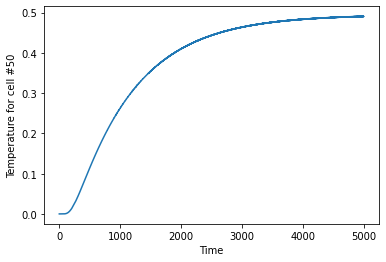

In [6]:
index = size//2

plt.xlabel('Time')
plt.ylabel('Temperature for cell #' + str(index))

plt.plot(solution.t, solution.y[index])

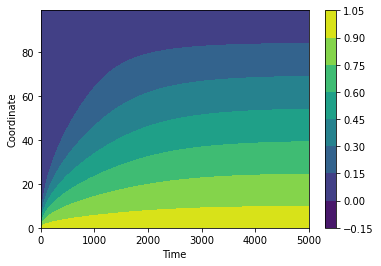

In [7]:
t_list, x_list = np.meshgrid(solution.t, np.arange(size))

plt.xlabel('Time')
plt.ylabel('Coordinate')

plt.contourf(t_list, x_list, solution.y)
plt.colorbar()

### Different starting parameters

In [8]:
tStart = 0
tEnd = 2000

size = 100
u0 = np.zeros([size])
u0[0] = 1
u0[-1] = 1

solution = integrate.solve_ivp(f_1D, [tStart, tEnd], u0, method='RK45', t_eval=np.linspace(tStart, tEnd, 10001))

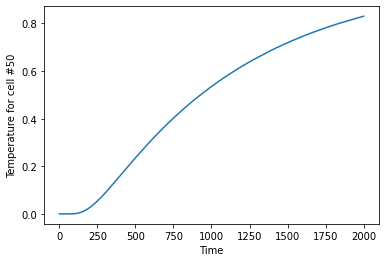

In [9]:
index = size//2

plt.xlabel('Time')
plt.ylabel('Temperature for cell #' + str(index))

plt.plot(solution.t, solution.y[index])

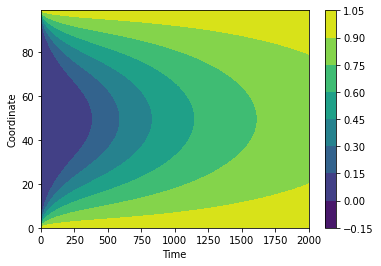

In [10]:
t_list, x_list = np.meshgrid(solution.t, np.arange(size))

plt.xlabel('Time')
plt.ylabel('Coordinate')

plt.contourf(t_list, x_list, solution.y)
plt.colorbar()

## In 2 dimensions

\\( 
\frac{\partial}{\partial t} u(\vec{r},t) = a \left(\frac{\partial^2}{\partial x^2} u(\vec{r},t) + \frac{\partial^2}{\partial y^2} u(\vec{r},t)\right)
\\)

Here, \\( u(\vec{r},t) \\) is an array \\(\{ u_{1,1}, u_{1,2}, \dots, u_{n,n} \} \\) that has different values for different times. We can discretize the spatial derivative according to:

\\( 
\frac{\partial^2}{\partial x^2} u_{i,j} + \frac{\partial^2}{\partial y^2} u_{i,j} = \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x)^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{(\Delta y)^2}
\\)

In [21]:
a = 1.0
dx = 1.0
dy = 1.0

def f_2D(t, u):
    unew = np.zeros([len(u), len(u)])
    unew[1:-1, 1:-1] = (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1]) * a/dx**2 + (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2]) * a/dy**2
    return unew

sizex = 20
sizey = 20

def f_2D_flattened(t, u):
    u = u.reshape(sizex, sizey)
    unew = np.zeros([sizex, sizey])
    unew[1:-1, 1:-1] = (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1]) * a/dx**2 + (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2]) * a/dy**2
    return unew.flatten()

In [35]:
tStart = 0
tEnd = 100

u0 = np.zeros([sizex, sizey])
u0[:, 0] = 100
u0[:, -1] = -100
u0[0, :] = 50


solution = integrate.solve_ivp(f_2D_flattened, [tStart, tEnd], u0.flatten(), method='RK45', t_eval=np.linspace(tStart, tEnd, 1001))

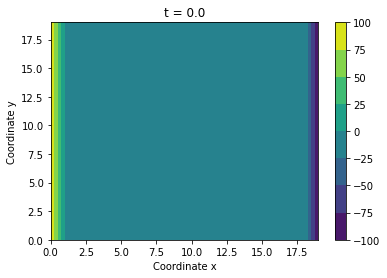

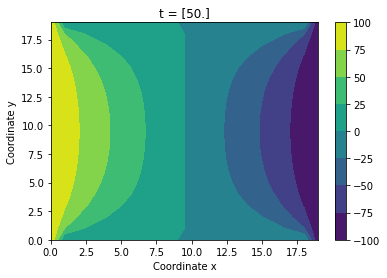

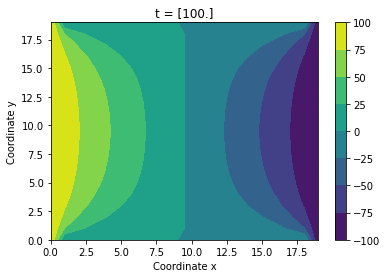

In [36]:
x_list, y_list = np.meshgrid(np.arange(sizex), np.arange(sizey))

tIndex = 0

plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')
plt.title('t = ' + str(solution.t[tIndex]))

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.show()

tIndex = np.where(solution.t == tEnd // 2)

plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')
plt.title('t = ' + str(solution.t[tIndex]))

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.show()

tIndex = np.where(solution.t == tEnd)

plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')
plt.title('t = ' + str(solution.t[tIndex]))

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.show()


In [37]:
solution.y[350,900]

-1.6648093446204089

In [38]:
import json

data = {'time': solution.t.tolist(), 'solution': solution.y.tolist()}
with open('solution_heat.json', 'w') as f:
    json.dump(data, f, indent=4)

In [15]:
# from matplotlib.animation import PillowWriter
# from matplotlib.animation import ImageMagickWriter

# metadata = dict(title='Movie', artist='sarelg')
# writer = PillowWriter(fps=15, metadata=metadata)

# fig, ax = plt.subplots()
# # frames_to_use = solution.t[::10]
# with writer.saving(fig, "heat.gif", dpi=200):
#     for i, tval in enumerate(solution.t):
#         ax.cla()
        
#         contour = ax.contourf(x_list, y_list, solution.y[:, i].reshape(sizex, sizey))

#         writer.grab_frame()


### Different starting conditions

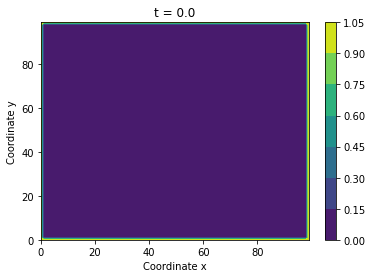

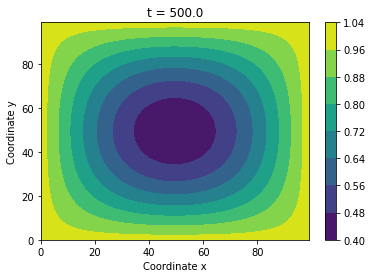

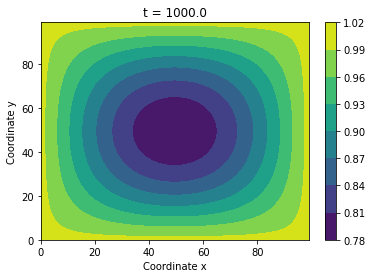

In [101]:
tStart = 0
tEnd = 1000

u0 = np.zeros([sizex, sizey])
u0[0, :] = 1
u0[:, 0] = 1

u0[-1, :] = 1
u0[:, -1] = 1

solution = integrate.solve_ivp(f_2D_flattened, [tStart, tEnd], u0.flatten(), method='RK45', t_eval=np.linspace(tStart, tEnd, 1001))

x_list, y_list = np.meshgrid(np.arange(sizex), np.arange(sizey))

tIndex = 0

plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')
plt.title('t = ' + str(solution.t[tIndex]))

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.show()

tIndex = tEnd // 2

plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')
plt.title('t = ' + str(solution.t[tIndex]))

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.show()

tIndex = tEnd

plt.xlabel('Coordinate x')
plt.ylabel('Coordinate y')
plt.title('t = ' + str(solution.t[tIndex]))

plt.contourf(x_list, y_list, solution.y[:, tIndex].reshape(sizex, sizey))
plt.colorbar()
plt.show()